# **🏨Bangkok Airbnb Pricing Framework and Market Analysis**

The project aims to analyze 15000+ active **Airbnb listings in Bangkok** from 2012 to 2022 to develop a data-driven pricing framework for Airbnb hosts in Bangkok by analyzing key market dynamics that influence listing prices.

## Business Question
"What are the key factors that influence Airbnb prices in Bangkok? How can these insights help hosts develop a more **competitive pricing framework** to maximize revenue?

## Objectives

1. Identify pricing patterns across neighborhoods, room types, and host characteristics
2. Examine how availability, reviews, and listing, experience affect listing price
3. Compare how the different market segments (normal, luxury, and long-term) are positioned and how hosts can align with them.
4. Provide data-driven pricing guidelines for new and existing Airbnb hosts.

## Case Study
### Stakeholders
1. Individual Airbnb Hosts, we can deliver revenue increase through price optimization.
2. Airbnb Strategy team: Bangkok market insight can be used to optimize pricing suggestions and improve customer-facing operations.

### Positioning
I will be positioning myself as a Pricing/Revenue Analyst conducting market study for Bangkok's Airbnb ecosystem.

## Data Dictionary
Listing data only consists of Active listings from 2012 to 2022.

| feature | description | 
|---|---|
| id | Listing unique ID. |
| name | Listing name. |
| host_id | Host unique ID. |
| host_name | Host name. |
| neighborhood | Listing neighborhood location. |
| latitude | Geographic coordinate. |
| longitude | Geographic coordinate. |
| room_type | Entire home/apt, Hotel room, Private room, Shared room. |
| price | Daily renting price in THB. |
| minimum_nights | Minimum number of nights to rent of the listing. |
| number_of_reviews | Amount of reviews the listing has. |
| last_review | Date of the latest review. |
| calculated_host_listings_count | Amount of listing this specific host has. |
| availability_365 | How many days the listing is available in a year. |
| number_of_reviews_ltm | Amount of reviews the listing has in the last 12 months. |




### Import Libraries

In [1]:
#DATA SCIENCE, WRANGLING, AND VISUALIZATION LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import folium

### Import all data

In [9]:
#IMPORT NORMAL DF
path_normal = r"C:\Users\mariq\Documents\2. KERJA\Purwadika\Module 2\Capstone 2\df_normal_cleaned.csv"
df_normal = pd.read_csv(path_normal)

#SHOW FIRST 5 ROWS
df_normal.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,is_luxury,is_long_term,availability_ratio,log_price
0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,False,False,0.967123,7.552762
1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,0.00,2,358,0,False,False,0.980822,7.183112
2,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,False,False,0.884932,7.160069
3,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,0.00,3,365,0,False,False,1.000000,7.552762
4,48736.0,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2014-02-03,0.01,1,365,0,False,False,1.000000,7.351800


In [8]:
#IMPORT LUXURY DF
path_luxury = r"C:\Users\mariq\Documents\2. KERJA\Purwadika\Module 2\Capstone 2\df_luxury_cleaned.csv"
df_luxury = pd.read_csv(path_luxury)

#SHOW FIRST 5 ROWS
df_luxury.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,is_luxury,is_long_term,availability_ratio,log_price
0,66046.0,"24Flr- 1br Apt near JJ, MRT, BTS",323158,Sue,Chatuchak,13.82298,100.56484,Entire home/apt,122594,2,9,2020-03-04,0.09,6,180,0,True,False,0.493151,11.716642
1,185364.0,Beautiful Wood Bangkok Resort House,889670,Narumon,Nong Chok,13.77900,100.83671,Entire home/apt,8658,1,0,NaN,0.00,1,363,0,True,False,0.994521,9.066355
2,1323380.0,Master Suite in Pool Villa,2975807,Ingo,Vadhana,13.74618,100.55168,Private room,9600,28,1,2017-06-19,0.01,2,365,0,True,False,1.000000,9.169623
3,854660.0,Nostalgic Thai House - The Villa,931710,Jeremy,Nong Chok,13.77672,100.83851,Entire home/apt,8658,1,1,2015-09-03,0.01,2,365,0,True,False,1.000000,9.066355
4,858311.0,"River view penthouse 30 Fl, 5 Pers, taxi included",4491588,Donald,Khlong San,13.72135,100.50800,Entire home/apt,7929,2,256,2022-12-15,2.13,1,267,43,True,False,0.731507,8.978408


In [10]:
#IMPORT LONGTERM DF
path_longterm = r"C:\Users\mariq\Documents\2. KERJA\Purwadika\Module 2\Capstone 2\df_longterm_cleaned.csv"
df_longterm = pd.read_csv(path_longterm)

#SHOW FIRST 5 ROWS
df_longterm.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,is_luxury,is_long_term,availability_ratio,log_price
0,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,0.00,1,365,0,False,True,1.000000,6.685861
1,1704776.0,NEw Pro!! Bungalow Bkk Centre,2129668,Wimonpak,Bang Kho Laem,13.69757,100.52880,Entire home/apt,1000,250,19,2017-08-03,0.17,41,365,0,False,True,1.000000,6.908755
2,1808600.0,Contemporary Modern Duplex-Thong Lo,9478184,Shine,Khlong Toei,13.72097,100.57823,Entire home/apt,2078,60,83,2018-09-12,0.75,1,55,0,False,True,0.150685,7.639642
3,1842066.0,ICONSIAM River view on 49th floor,9626074,Weera,Bang Rak,13.72287,100.51678,Private room,2500,180,15,2015-12-08,0.14,1,88,0,False,True,0.241096,7.824446
4,169514.0,2br apt in Sukhumvit Asoke near BTS,729617,Kanchuya,Vadhana,13.74464,100.55784,Entire home/apt,1732,90,0,NaN,0.00,1,365,0,False,True,1.000000,7.457609


### Set Custom Airbnb Color

In [113]:
custom_colors = ["#FF565F", "#00A699", "#FC642D", "#484848", "#767676" ]
sns.set_palette(custom_colors)

## 1. Core Market Overview
Understand the overall structure of Bangkok’s core Airbnb market to define the baseline for Pricing.

### Price Distribution

In [12]:
#MIN, MAX, RANGE
price_max = df_normal["price"].max()
price_min = df_normal["price"].min()
price_range = price_max - price_min

print(f"Minimum price: {price_min} Baht")
print(f"Maximum price: {price_max} Baht")
print()

#MEAN, MEDIAN, STD
price_mean = df_normal["price"].mean()
price_median = df_normal["price"].median()
price_std = df_normal["price"].std()

print(f"Mean price: {price_mean} Baht")
print(f"Median price: {price_median} Baht")
print()

#NORMALITY, SKEWNESS, ETC
price_skew = df_normal["price"].skew()
price_kurt = df_normal["price"].kurt()
statDP, p_valueDP = stats.normaltest(df_normal["price"])

print("Skewness:", price_skew) #If positive, right skewed
print("Kurtosis:", price_kurt) #If > 3, means very sharp peak
print("p-value D'Agostino Pearson:", p_valueDP)
print()

#QUARTILE VALUES, LOWER/UPPER BOUND
price_q1 = df_normal["price"].quantile(0.25)
price_q2 = df_normal["price"].quantile(0.50)
price_q3 = df_normal["price"].quantile(0.75)

print(f"Q1: {price_q1} Baht")
print(f"Q2: {price_q2} Baht")
print(f"Q3: {price_q3} Baht")
print()

price_iqr = price_q3 - price_q1

price_lb = price_q1 - 1.5 * price_iqr
price_ub = price_q3 + 1.5 * price_iqr

print(f"Price IQR: {price_iqr}")
print(f"Price Lower Boundary: {price_lb}")
print(f"Price Upper Boundary: {price_ub}")
print()

#PRICE OUTLIERS
price_outliers = df_normal[(df_normal["price"] > price_ub) | (df_normal["price"] < price_lb)]
print(f"Number of price outliers: {len(price_outliers)}")

#COMPARE WITH .describe()
df_normal["price"].describe(include="all")

Minimum price: 278 Baht
Maximum price: 7500 Baht

Mean price: 1789.8853244837758 Baht
Median price: 1400.0 Baht

Skewness: 1.7287062031408682
Kurtosis: 3.176032191430764
p-value D'Agostino Pearson: 0.0

Q1: 900.0 Baht
Q2: 1400.0 Baht
Q3: 2214.0 Baht

Price IQR: 1314.0
Price Lower Boundary: -1071.0
Price Upper Boundary: 4185.0

Number of price outliers: 858


count    13560.000000
mean      1789.885324
std       1300.779644
min        278.000000
25%        900.000000
50%       1400.000000
75%       2214.000000
max       7500.000000
Name: price, dtype: float64

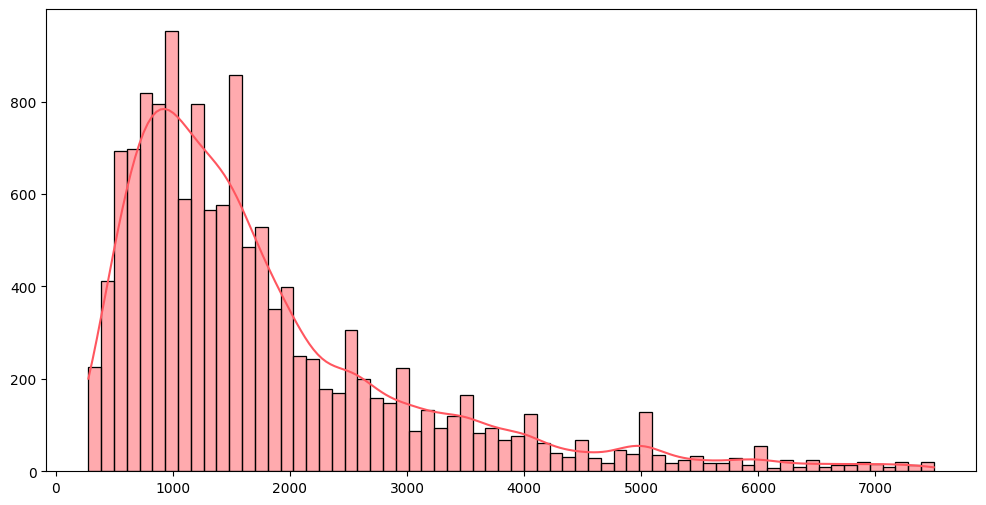

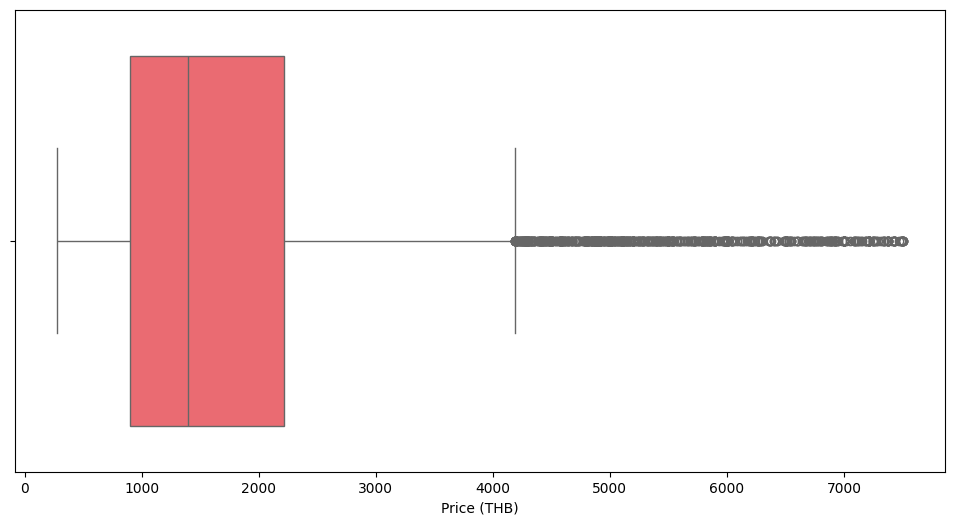

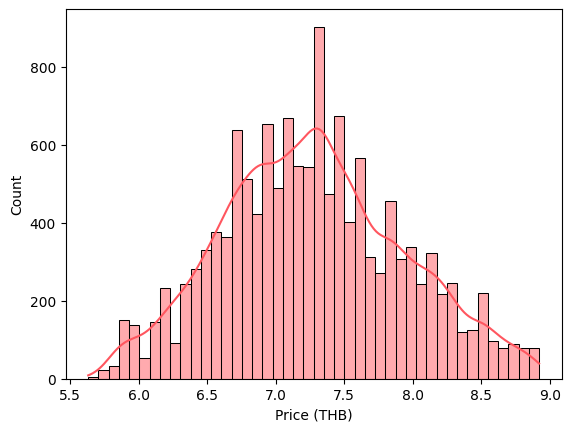

In [13]:
#HISTOGRAM
plt.figure(figsize=(12,6))
sns.histplot(df_normal['price'], kde=True)
plt.xlabel("")
plt.ylabel("")
plt.show()

#BOXPLOT
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_normal,
    x="price"
    )
plt.xlabel("Price (THB)")
plt.show()

#HISTOGRAM
sns.histplot(df_normal['log_price'], kde=True)
plt.xlabel("Price (THB)")
plt.show()

On typical airbnb listings:
- Price is right-skewed, expensive listing pulls mean value.
- Most prices sit around Q1 - Median, a good ~70% of listings are below 2000 THB.

### Most common room type

C:\Users\mariq\AppData\Local\Temp\ipykernel_31516\1201595790.py:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.countplot(data=df_normal, x="room_type", hue="room_type", palette=custom_colors)


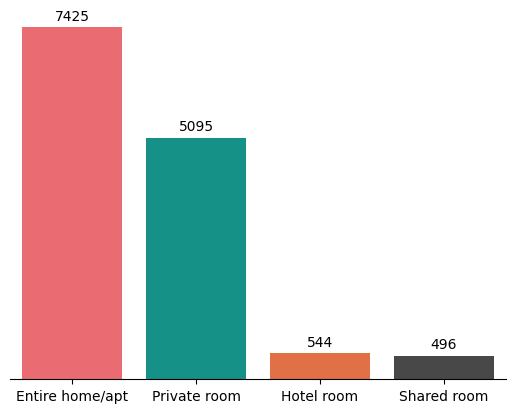

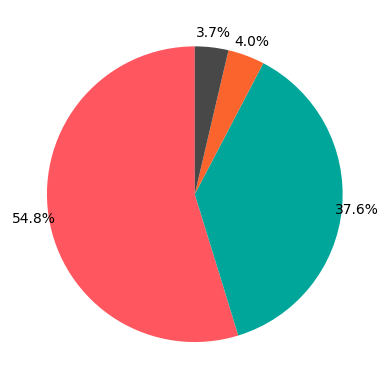

In [ ]:
#BARPLOT
ax = sns.countplot(data=df_normal, x="room_type", hue="room_type", palette=custom_colors)
sns.despine(left=True)

total = len(df_normal)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

#HIDE Y AXIS
ax.yaxis.set_visible(False)
plt.xlabel("")
plt.ylabel("")
plt.show()

#PIEPLOT
room_counts = df_normal["room_type"].value_counts()
plt.pie(room_counts,autopct="%1.1f%%", startangle=90, pctdistance=1.1)
plt.show()

### Host Category

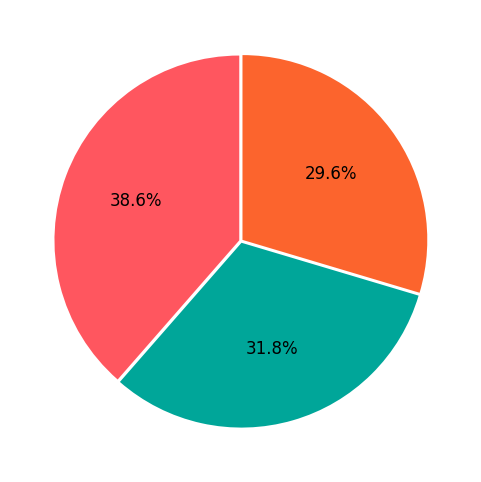

In [ ]:
#COUNT AMOUNT PER CATEGORY
host_counts = df_normal["host_type"].value_counts()

#PIE CHART
plt.figure(figsize=(6,6))
plt.pie(
    host_counts,
    autopct="%1.1f%%",        
    startangle=90,         
    colors=custom_colors,
    explode=[0.01]*len(host_counts),  
    textprops={"fontsize": 12}
)
plt.show()

All map visualization is **done on Tableau**

## 2. Pricing Analysis

### Brief Host analysis

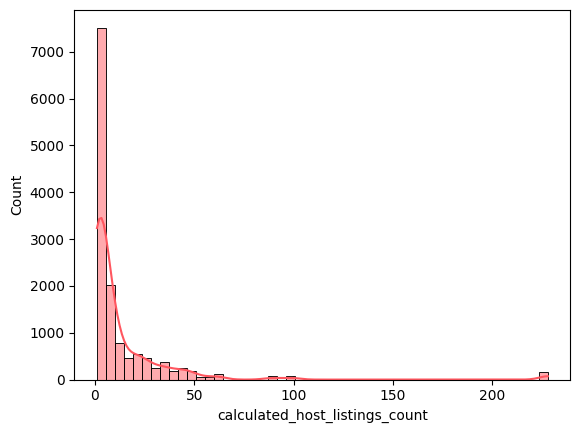

In [140]:
#HISTOGRAM
sns.histplot(df_normal['calculated_host_listings_count'], kde=True, bins=50)
plt.show()

Manually inspecting hosts, We found that some hosts have multiple listings on the same coordinates. This is especially true on hotel room types. Which means hosts treat different rooms as different listings. This skews host_listings a lot as one property have multiple listings.

We will try to segment hosts by amount of listings.

These thresholds are adapted from Airbnb market research (InsideAirbnb & AirDNA) where host behavior "typically changes significantly after managing more than 10 listings".

- Typical host = 1-2 listings
- Experienced host = 3-10 listings
- Professional host = 10+ listings

In [139]:
#CREATE CATEGORIES
def categorize_host(listing_count):
    if listing_count <= 2:
        return "Typical Host"
    elif listing_count <= 10:
        return "Experienced Host"
    else:
        return "Professional Host"

df_normal["host_type"] = df_normal["calculated_host_listings_count"].apply(categorize_host)

C:\Users\mariq\AppData\Local\Temp\ipykernel_31516\3891566695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_normal, estimator="median", x="host_type", y="price",errorbar=None, palette= custom_colors)
C:\Users\mariq\AppData\Local\Temp\ipykernel_31516\3891566695.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax = sns.barplot(data=df_normal, estimator="median", x="host_type", y="price",errorbar=None, palette= custom_colors)


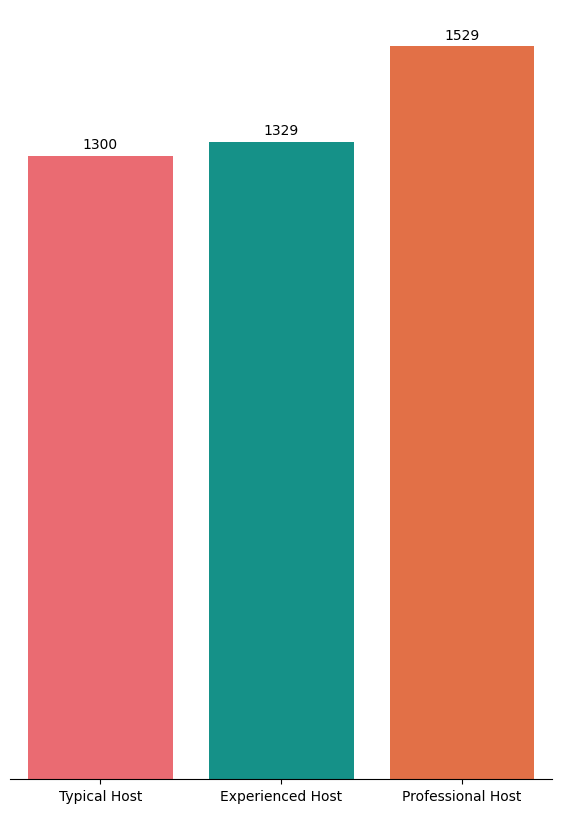

In [129]:
#BARPLOT
plt.figure(figsize=(7,10))
ax = sns.barplot(data=df_normal, estimator="median", x="host_type", y="price",errorbar=None, palette= custom_colors)

#ANNOTATIONS
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

ax.yaxis.set_visible(False)
sns.despine(top=True, left=True)
plt.xlabel("")
plt.ylabel("Price (THB)")
plt.show()

### Do professional hosts have higher occupancy (lower availability ratio)?

C:\Users\mariq\AppData\Local\Temp\ipykernel_4308\3485354329.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.boxplot(data=df_normal, x="host_type", y="availability_ratio", hue="host_type", palette=custom_colors)


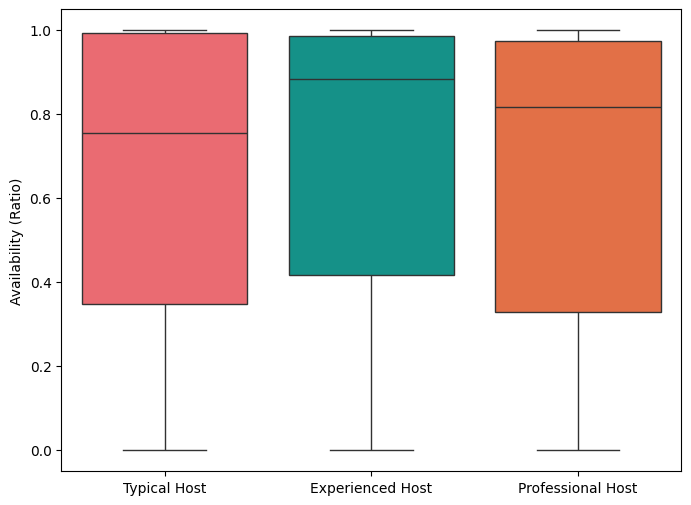

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_normal, x="host_type", y="availability_ratio", hue="host_type", palette=custom_colors)
plt.ylabel("Availability (Ratio)") # optional: use log scale if data is skewed
plt.xlabel("")
plt.show()

### Do professional hosts get more reviews?

C:\Users\mariq\AppData\Local\Temp\ipykernel_4308\3516879651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_normal, x="host_type", y="number_of_reviews", palette=custom_colors)
C:\Users\mariq\AppData\Local\Temp\ipykernel_4308\3516879651.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(data=df_normal, x="host_type", y="number_of_reviews", palette=custom_colors)


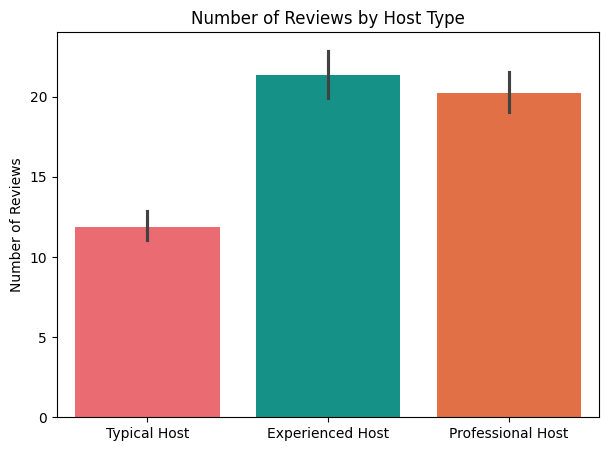

In [ ]:
#BARPLOT
plt.figure(figsize=(7,5))
sns.barplot(data=df_normal, x="host_type", y="number_of_reviews", palette=custom_colors)
plt.title("Number of Reviews by Host Type")
plt.xlabel("")
plt.ylabel("Number of Reviews")
plt.show()

## Do professional hosts charge more?

C:\Users\mariq\AppData\Local\Temp\ipykernel_31516\3734411542.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.boxplot(data=df_normal, x="host_type", y="price", hue="host_type", palette=custom_colors)


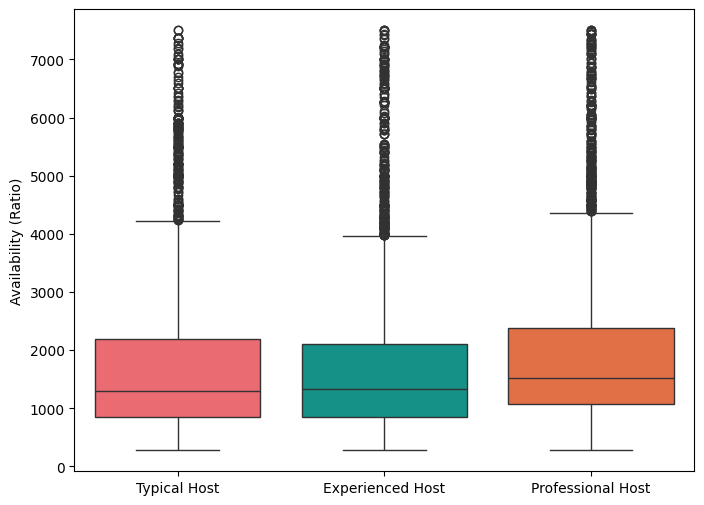

In [ ]:
#BARPLOT
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_normal, x="host_type", y="price", hue="host_type", palette=custom_colors)
plt.ylabel("Availability (Ratio)")
plt.xlabel("")
plt.show()

### Price vs Host Listing Count (Regression Line)

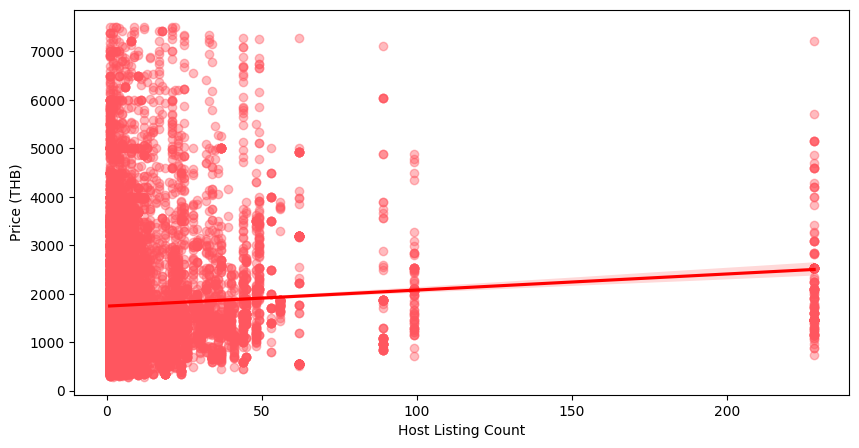

In [142]:
#REGRESSSION PLOT
plt.figure(figsize=(10, 5))
sns.regplot(data=df_normal, x="calculated_host_listings_count", y="price",
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'})

plt.xlabel("Host Listing Count")
plt.ylabel("Price (THB)")
plt.show()

Slightly positive correlation, but only noticeable among 50+ listings.

### Price by Room type

C:\Users\mariq\AppData\Local\Temp\ipykernel_31516\1901857356.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normal, x="room_type", y="price", palette=custom_colors , showfliers=False)
C:\Users\mariq\AppData\Local\Temp\ipykernel_31516\1901857356.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(data=df_normal, x="room_type", y="price", palette=custom_colors , showfliers=False)


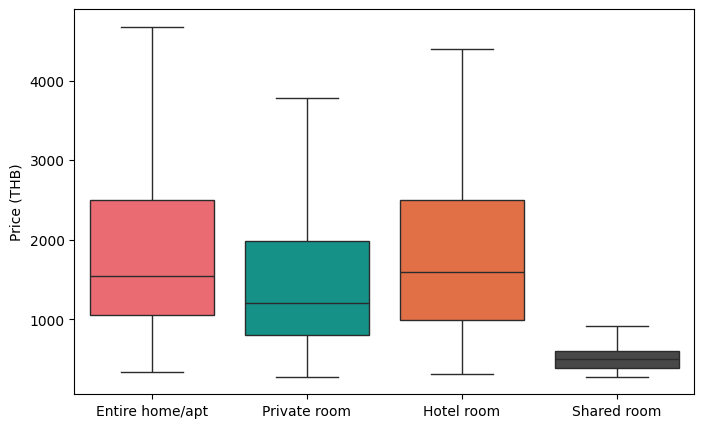

In [143]:
#BOXPLOT
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_normal, x="room_type", y="price", palette=custom_colors , showfliers=False)
plt.xlabel("")
plt.ylabel("Price (THB)")
plt.show()


- Shared room has a very small price range and is consistently cheap except for some outliers.
- Hotel room has the most inconsistent pricing range, despite only making up 4.3 percent of the market.
- Entire home/apts and private room have the most amount of outliers. This reflects the greater demand for more luxurious option since they make up for 50%+ of the market.

## Review Count vs Price (Scatterplot)
Does amount of reviews affect price?

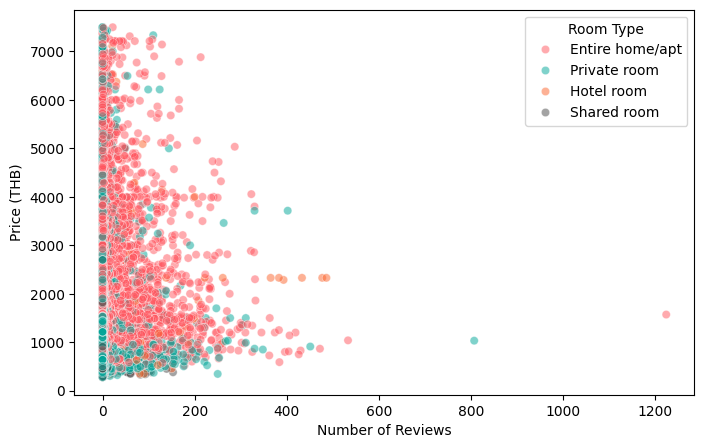

In [131]:
#SCATTERPLOT
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_normal,
    x="number_of_reviews",
    y="price",
    hue="room_type",
    alpha=0.5
)

plt.xlabel("Number of Reviews")
plt.ylabel("Price (THB)")
plt.legend(title="Room Type")
plt.show()

No significant linear correlation fonud. Cheaper listings get more reviews.

## Availability 365/Ratio vs Price (Scatterplot)
Are listings with higher prices get rented more in a year?

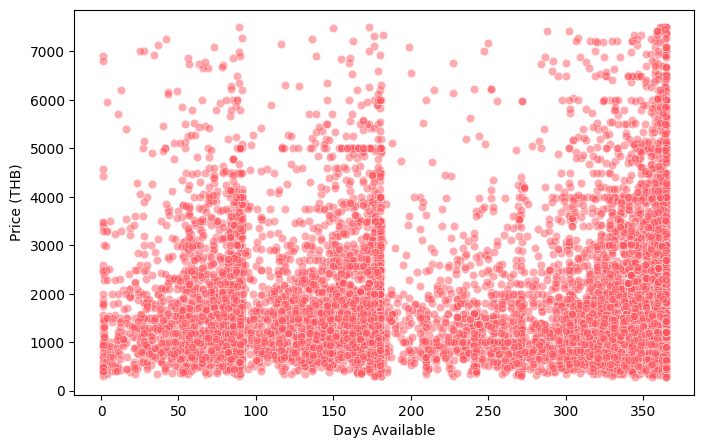

In [ ]:
#SCATTERPLOT (AVAILABILITY_365)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_normal, x="availability_365", y="price", alpha=0.5)
plt.xlabel("Days Available")
plt.ylabel("Price (THB)")
plt.show()


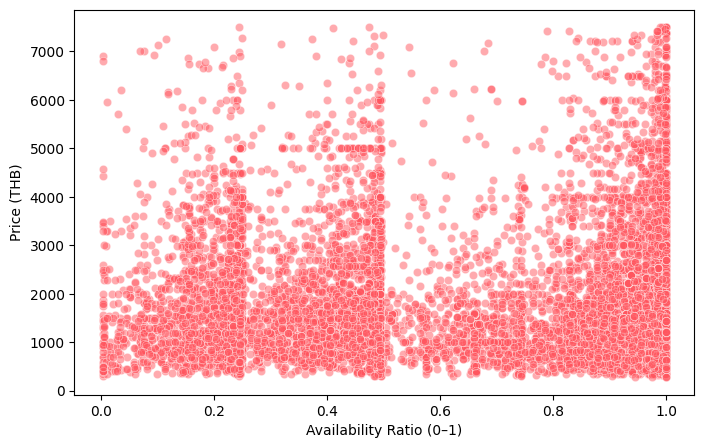

In [ ]:
#SCATTERPLOT (AVAILABILITY_RATIO)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_normal, x="availability_ratio", y="price", alpha=0.5)
plt.xlabel("Availability Ratio (0–1)")
plt.ylabel("Price (THB)")
plt.show()


No significant linear correlation found. Clusters found on 90, 180, 270 days. 

## Price vs Minimum Nights
Does lower minimum nights affect listing price?

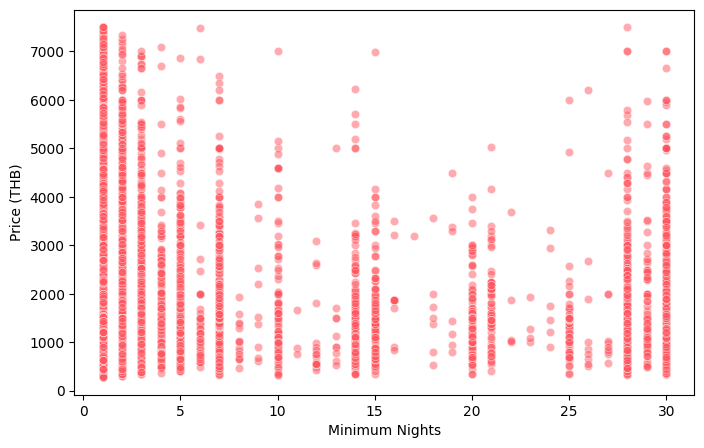

In [135]:
##SCATTERPLOT
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_normal, x="minimum_nights", y="price", alpha=0.5)
plt.xlabel("Minimum Nights")
plt.ylabel("Price (THB)")
plt.show()

## Host Metrics

In [159]:
df_normal["minimum_nights"].describe()

count    14349.000000
mean         6.386159
std          9.883004
min          1.000000
25%          1.000000
50%          1.000000
75%          5.000000
max         30.000000
Name: minimum_nights, dtype: float64

## Top 10 prices by neighborhood

In [161]:
top10_price = (
    df_normal.groupby("neighbourhood")["price"]
    .median()
    .nlargest(10)
    .reset_index()
)

print(top10_price)

          neighbourhood   price
0           Parthum Wan  2268.0
1               Vadhana  1874.0
2        Samphanthawong  1857.0
3              Bang Rak  1800.0
4           Khlong Toei  1670.0
5  Pom Prap Sattru Phai  1557.0
6           Ratchathewi  1529.0
7        Thawi Watthana  1500.0
8             Yan na wa  1489.0
9           Bangkok Yai  1400.0


## 3. Luxury Listings Analysis

### Price

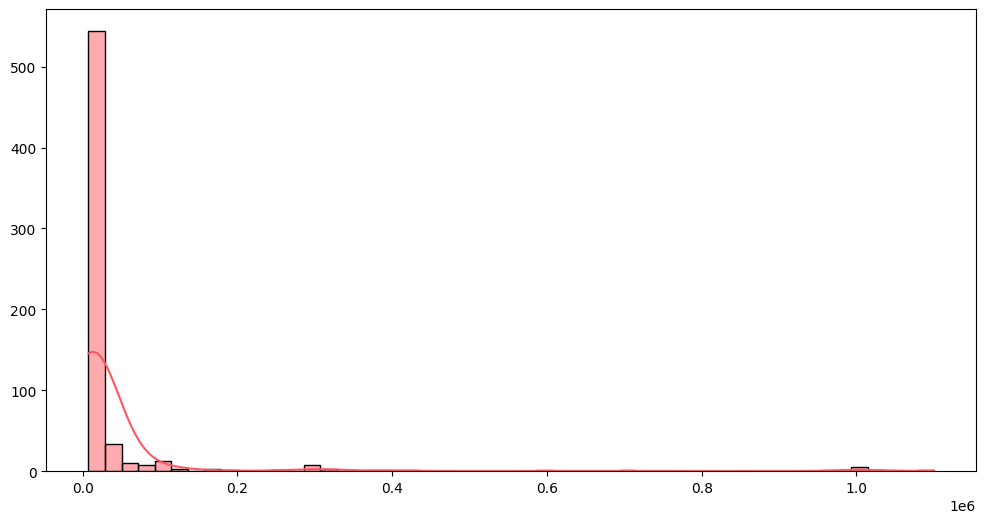

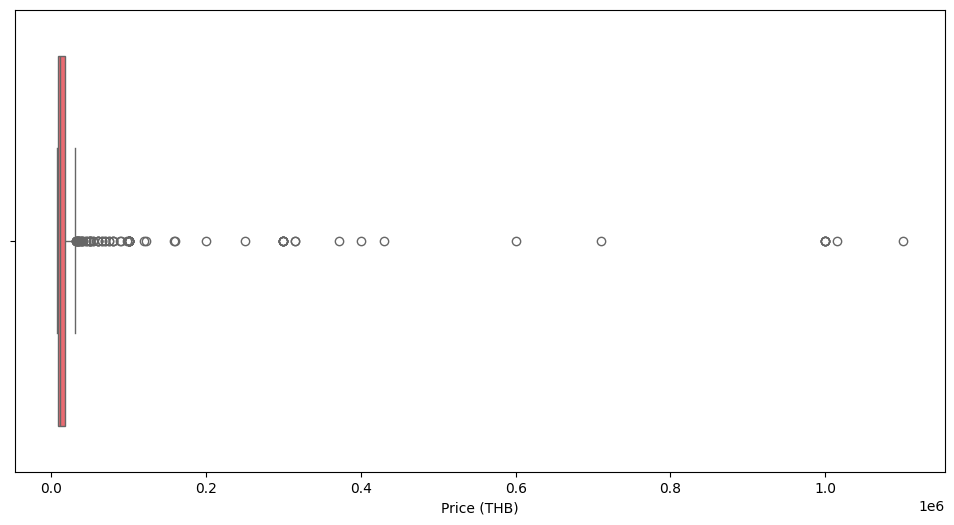

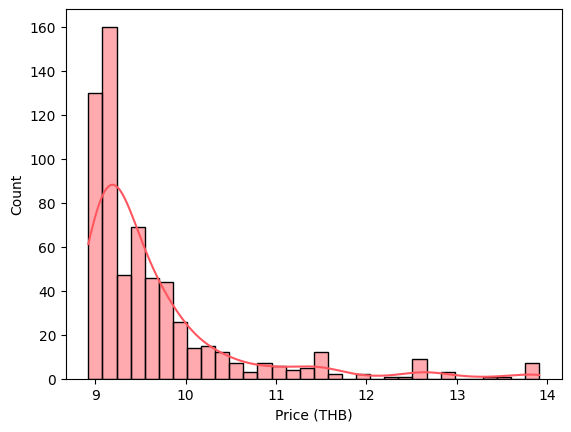

In [50]:
#HISTOGRAM
plt.figure(figsize=(12,6))
sns.histplot(df_luxury['price'], kde=True)
plt.xlabel("")
plt.ylabel("")
plt.show()

#BOXPLOT
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_luxury,
    x="price"
    )
plt.xlabel("Price (THB)")
plt.show()

#HISTOGRAM
sns.histplot(df_luxury['log_price'], kde=True)
plt.xlabel("Price (THB)")
plt.show()

## Room Type compostiion

C:\Users\mariq\AppData\Local\Temp\ipykernel_31516\1144772236.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.countplot(data=df_luxury, x="room_type", hue="room_type", palette=custom_colors)


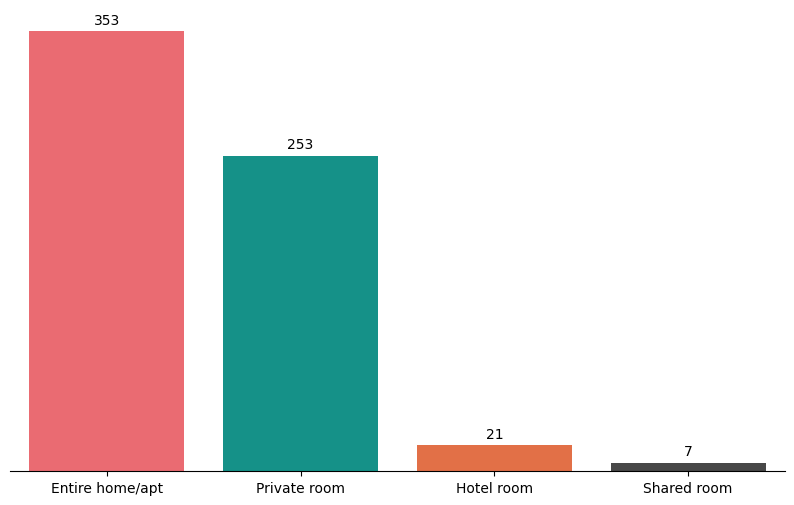

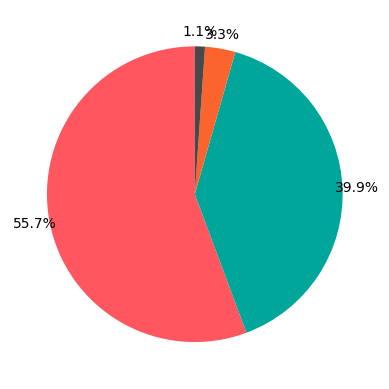

In [144]:
#COUNTPLOT
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_luxury, x="room_type", hue="room_type", palette=custom_colors)
sns.despine(left=True)

total = len(df_luxury)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

ax.yaxis.set_visible(False)

plt.xlabel("")
plt.ylabel("")
plt.show()

#PIE PLOT
room_counts = df_luxury["room_type"].value_counts()
plt.pie(room_counts,autopct="%1.1f%%", startangle=90, pctdistance=1.1)
plt.show()

### Comparison: Number of reviews normal vs luxury listings

C:\Users\mariq\AppData\Local\Temp\ipykernel_31516\3862128438.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_compare, y="segment", x="number_of_reviews", palette=custom_colors, errorbar=None)
C:\Users\mariq\AppData\Local\Temp\ipykernel_31516\3862128438.py:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(data=df_compare, y="segment", x="number_of_reviews", palette=custom_colors, errorbar=None)


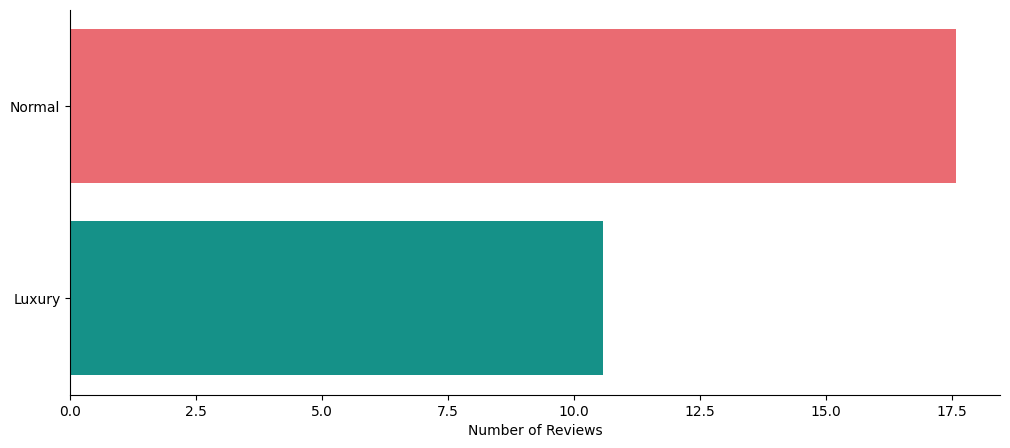

In [145]:
#CREATE COMPARISON DF
df_normal["segment"] = "Normal"
df_luxury["segment"] = "Luxury"
df_compare = pd.concat([df_normal[["segment", "number_of_reviews"]],df_luxury[["segment", "number_of_reviews"]]])

#BARPLOT
plt.figure(figsize=(12,5))
sns.barplot(data=df_compare, y="segment", x="number_of_reviews", palette=custom_colors, errorbar=None)
sns.despine()
plt.title("")
plt.xlabel("Number of Reviews")
plt.ylabel("")
plt.show()

### Comparison: Median Price normal vs luxury listings

C:\Users\mariq\AppData\Local\Temp\ipykernel_31516\2949219875.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_prices, y="segment", x="median_price", palette=custom_colors)
C:\Users\mariq\AppData\Local\Temp\ipykernel_31516\2949219875.py:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(data=median_prices, y="segment", x="median_price", palette=custom_colors)


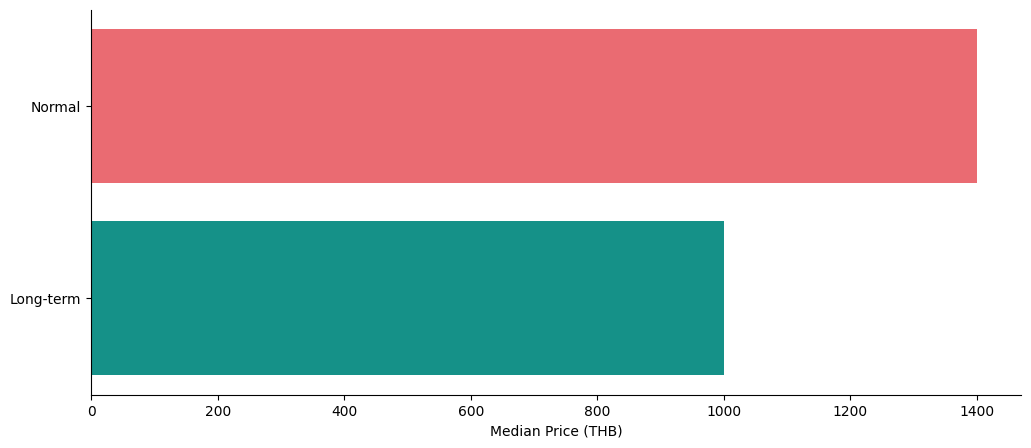

In [ ]:
plt.figure(figsize=(12,5))
median_prices = pd.DataFrame({
    "segment": ["Normal", "Long-term"],
    "median_price": [df_normal["price"].median(), df_longterm["price"].median()]
})

sns.barplot(data=median_prices, y="segment", x="median_price", palette=custom_colors)


plt.xlabel("Median Price (THB)")
plt.ylabel("")
sns.despine()
plt.show()

## Luxury Min nights distribution

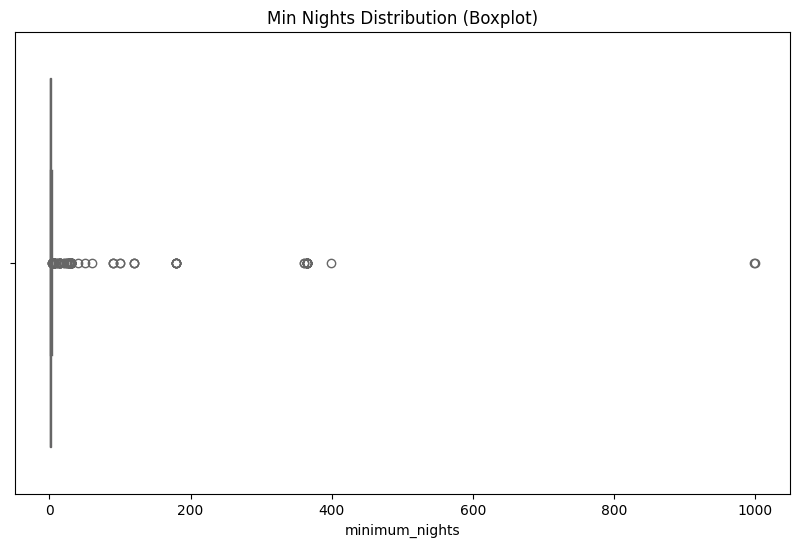

np.float64(1.0)

In [96]:
plt.figure(figsize=(10,6))
plt.title("Min Nights Distribution (Boxplot)")
sns.boxplot(
    data=df_luxury,
    x="minimum_nights"
    )
# plt.xscale('log')  # To visualize large values
plt.show()

df_luxury["minimum_nights"].median()

## 4. Long-term Listings Analysis

## Price

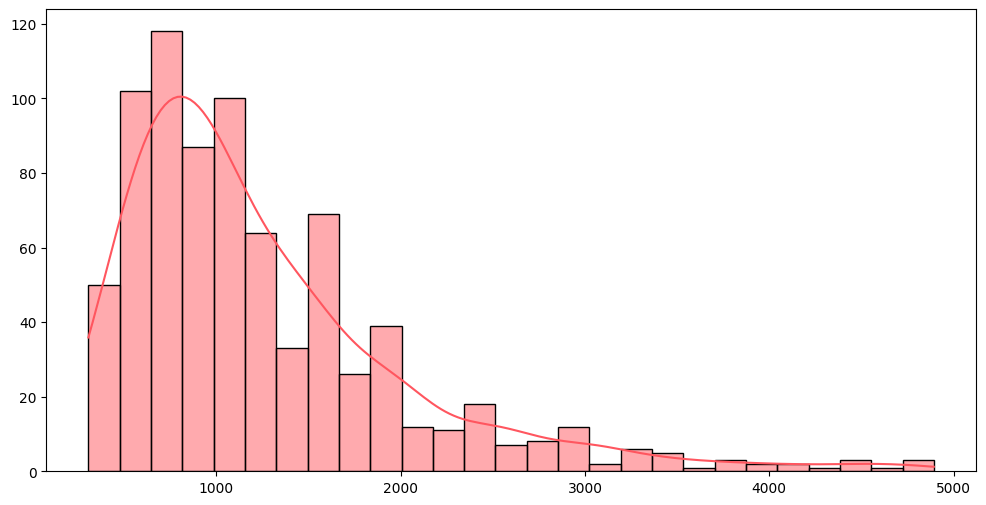

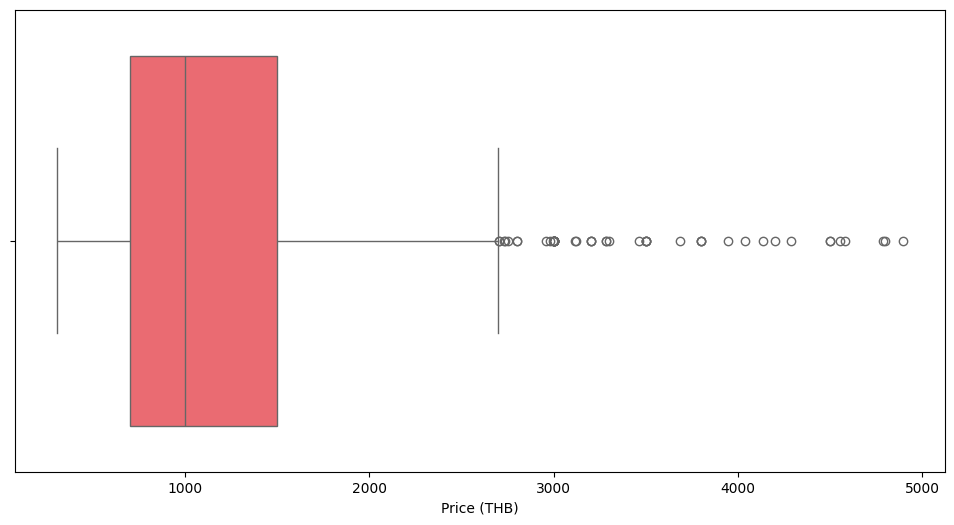

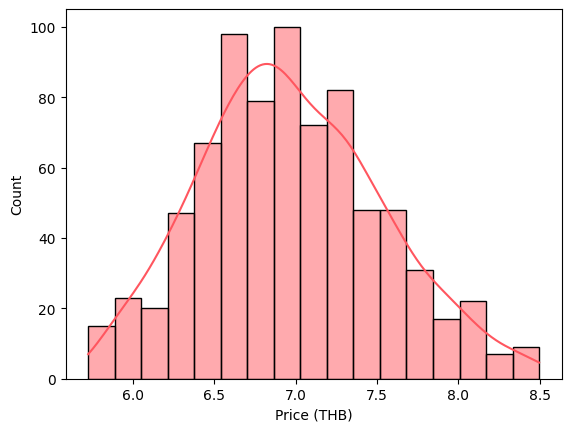

In [146]:
#HISTOGRAM
plt.figure(figsize=(12,6))
sns.histplot(df_longterm['price'], kde=True)
plt.xlabel("")
plt.ylabel("")
plt.show()

#BOXPLOT
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_longterm,
    x="price"
    )
plt.xlabel("Price (THB)")
plt.show()

#HISTOGRAM
sns.histplot(df_longterm['log_price'], kde=True)
plt.xlabel("Price (THB)")
plt.show()

In [150]:
df_longterm["price"].describe(include="all")

count     785.000000
mean     1250.375796
std       785.706485
min       305.000000
25%       700.000000
50%      1000.000000
75%      1500.000000
max      4893.000000
Name: price, dtype: float64

### Room Type Distribution

C:\Users\mariq\AppData\Local\Temp\ipykernel_31516\1548069693.py:2: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.countplot(data=df_longterm, x="room_type", hue="room_type", palette=custom_colors)


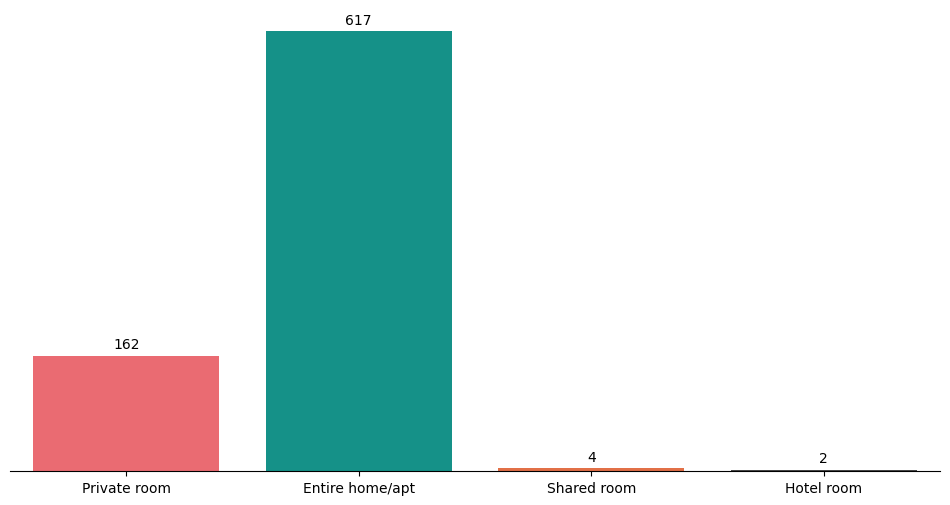

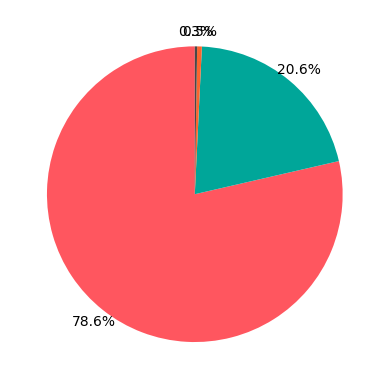

In [ ]:
#COUNTPLOT
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_longterm, x="room_type", hue="room_type", palette=custom_colors)
sns.despine(left=True)

total = len(df_luxury)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

ax.yaxis.set_visible(False)
plt.xlabel("")
plt.ylabel("")
plt.show()

#PIE PLOT
room_counts = df_longterm["room_type"].value_counts()
plt.pie(room_counts,autopct="%1.1f%%", startangle=90, pctdistance=1.1)
plt.show()